**EE219 Winter 2019, Project 2**

In [1]:
# setting the random seed
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_20newsgroups

np.random.seed(42)
random.seed(42)

# Import packages

from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.base import BaseEstimator, TransformerMixin
import re
# The lemmatizer is actually pretty complicated, it needs Parts of Speech (POS) tags
import nltk
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')

In [3]:
# Define function that generates the 5 measure scores

def scores(ground, clustered):
    from sklearn.metrics import homogeneity_score
    from sklearn.metrics import completeness_score
    from sklearn.metrics import v_measure_score
    from sklearn.metrics import adjusted_rand_score
    from sklearn.metrics import adjusted_mutual_info_score

    homogeneity = homogeneity_score(ground, clustered.labels_)
    completeness = completeness_score(ground, clustered.labels_)
    v_measure = v_measure_score(ground, clustered.labels_)
    adjusted_rand_index = adjusted_rand_score(ground, clustered.labels_)
    adjusted_mutual_info = adjusted_mutual_info_score(ground, clustered.labels_)

    print('kmeans clustering results with k=2')
    print('-------------------------------------------------------------------')
    print('Homegeneity: {}'.format(homogeneity))
    print('Completeness: {}'.format(completeness))
    print('V-measure: {}'.format(v_measure))
    print('Adjusted Rand Index: {}'.format(adjusted_rand_index))
    print('Adjusted Mutual Information Score: {}'.format(adjusted_mutual_info))
    print('-------------------------------------------------------------------')

In [4]:
# Set the global directory to place figs in project:
figs_dir = 'figs'

import os
if not os.path.exists(figs_dir):
    os.mkdir(figs_dir)

In [5]:
# Fetching 20NewsGroups dataset

categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics', 'comp.sys.mac.hardware', 
              'comp.os.ms-windows.misc', 'rec.autos', 'rec.motorcycles', 
              'rec.sport.baseball', 'rec.sport.hockey']

twenty_data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)


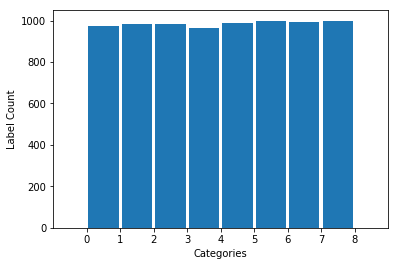

In [6]:
# Fetch all 8 news groups categories and plot a histogram of the training documents.

x = range(-1,23)
plt.hist(twenty_data.target, x, rwidth=0.9)
plt.xlabel('Categories')
plt.ylabel('Label Count')
plt.xticks(np.arange(9, step=1))
plt.xlim(left=-1, right = 9)
plt.savefig('{}/8-groups.eps'.format(figs_dir), format='eps', dpi=100)
plt.show()

In [7]:
# Change labels into binary based on two well separated classes: Class 1 (labels 0-3) and Class 2 (labels 4-7).
twenty_binary_labels = np.zeros(len(twenty_data.target))
for k in range(len(twenty_data.target)):
    if twenty_data.target[k] >= 4:
        twenty_binary_labels[k] = 1
    else:
        twenty_binary_labels[k] = 0
            
class_names = ['Class 1', 'Class 2']

**Question 1**

In [8]:
# Push documents through CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()

count_vect = CountVectorizer(min_df=3, stop_words='english')

# do for the whole set
X_data = count_vect.fit_transform(twenty_data.data)

In [9]:
# Report shapes of TF-IDF matrices

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# do for training
X_data_tfidf = tfidf_transformer.fit_transform(X_data)
print('Dimensions of the TF-IDF matrix are: {}'.format(X_data_tfidf.shape))

Dimensions of the TF-IDF matrix are: (7882, 27768)


**Question 2**

In [ ]:
# Applying k-means clustering
# data is called X_data_tfidf
from sklearn.cluster import KMeans

#reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#perfroming kmeans clsutering with k=2
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1001, n_init = 40).fit(X_data_tfidf)


**Question 2(a)**

In [ ]:
# Contingency matrix
from sklearn.metrics.cluster import contingency_matrix

contingency_matrix(twenty_binary_labels, kmeans.labels_)

**Question 2(b)**

In [ ]:
scores(twenty_binary_labels, kmeans.labels_)

#### Question 4

In [ ]:
# Perform SVD on the TF-IDF matrix
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000, random_state=42)
X_data_svd = svd.fit_transform(X_data_tfidf)

In [ ]:
# Plot variance ratios

variances = svd.explained_variance_ratio_

plt.figure()
plt.plot(np.cumsum(variances))
plt.title('Percent variance vs. r')
plt.xlabel('r')
plt.ylabel('Percent variance')
plt.show()

#### Question 5

In [11]:
# Initialize r, which is basically how many components we want to use.

r = [1, 2, 3, 5, 10, 20, 50, 100, 300]

In [12]:
# SVD

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300)
X_data_svd_r = svd.fit_transform(X_data_tfidf)

In [13]:
# Import packages

from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

In [14]:
svd_homogeneity = np.zeros(len(r))
svd_completeness = np.zeros(len(r))
svd_v = np.zeros(len(r))
svd_rand = np.zeros(len(r))
svd_mutual_info = np.zeros(len(r))

# svd_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40)
for i in range(len(r)):
    svd_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(X_data_svd_r.T[0:r[i]].T)
    svd_homogeneity[i] = homogeneity_score(twenty_binary_labels, svd_kmeans.labels_)
    svd_completeness[i] = completeness_score(twenty_binary_labels, svd_kmeans.labels_)
    svd_v[i] = v_measure_score(twenty_binary_labels, svd_kmeans.labels_)
    svd_rand[i] = adjusted_rand_score(twenty_binary_labels, svd_kmeans.labels_)
    svd_mutual_info[i] = adjusted_mutual_info_score(twenty_binary_labels, svd_kmeans.labels_)
    

C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: Future

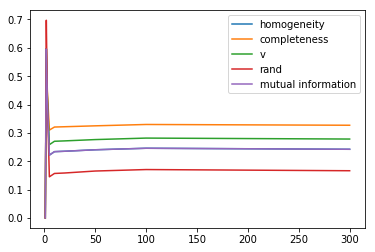

In [15]:
# Plot metrics for svd.

plt.figure()
plt.plot(r, svd_homogeneity)
plt.plot(r, svd_completeness)
plt.plot(r, svd_v)
plt.plot(r, svd_rand)
plt.plot(r, svd_mutual_info)

plt.legend(['homogeneity', 'completeness', 'v', 'rand', 'mutual information'])
plt.show()

In [16]:
print('Homogeneity scores: ', np.round(svd_homogeneity, 4))
print('Completeness scores: ', np.round(svd_completeness, 4))
print('V measure scores: ', np.round(svd_v, 4))
print('Adjusted rand scores: ', np.round(svd_rand, 4))
print('Adjusted mutual information scores: ', np.round(svd_mutual_info, 4))

Homogeneity scores:  [3.000e-04 5.959e-01 4.164e-01 2.217e-01 2.339e-01 2.353e-01 2.405e-01
 2.459e-01 2.423e-01]
Completeness scores:  [3.000e-04 5.970e-01 4.506e-01 3.100e-01 3.207e-01 3.218e-01 3.249e-01
 3.297e-01 3.270e-01]
V measure scores:  [3.000e-04 5.965e-01 4.329e-01 2.585e-01 2.705e-01 2.718e-01 2.765e-01
 2.817e-01 2.784e-01]
Adjusted rand scores:  [3.000e-04 6.973e-01 4.199e-01 1.452e-01 1.570e-01 1.586e-01 1.656e-01
 1.708e-01 1.666e-01]
Adjusted mutual information scores:  [2.000e-04 5.959e-01 4.164e-01 2.216e-01 2.338e-01 2.353e-01 2.405e-01
 2.458e-01 2.422e-01]


In [17]:
# Import packages

from sklearn.decomposition import NMF

from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

In [18]:
# Initialize r and each an array for each metric.

r = [1, 2, 3, 5, 10, 20, 50, 100, 300]

nmf_homogeneity = np.zeros(len(r))
nmf_completeness = np.zeros(len(r))
nmf_v = np.zeros(len(r))
nmf_rand = np.zeros(len(r))
nmf_mutual_info = np.zeros(len(r))

In [19]:
# Perform NMF for each number of components and calculate each metric

for i in range(len(r)):
    nmf = NMF(n_components=r[i])
    X_data_nmf_r = nmf.fit_transform(X_data_tfidf)
    nmf_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(X_data_nmf_r)
    nmf_homogeneity[i] = homogeneity_score(twenty_binary_labels, nmf_kmeans.labels_)
    nmf_completeness[i] = completeness_score(twenty_binary_labels, nmf_kmeans.labels_)
    nmf_v[i] = v_measure_score(twenty_binary_labels, nmf_kmeans.labels_)
    nmf_rand[i] = adjusted_rand_score(twenty_binary_labels, nmf_kmeans.labels_)
    nmf_mutual_info[i] = adjusted_mutual_info_score(twenty_binary_labels, nmf_kmeans.labels_)

C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: Future

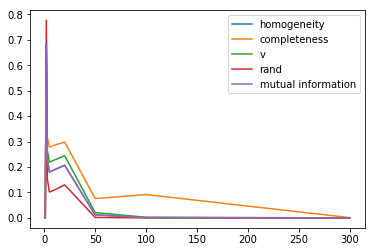

In [20]:
# Plot metrics for nmf.

plt.figure()
plt.plot(r, nmf_homogeneity)
plt.plot(r, nmf_completeness)
plt.plot(r, nmf_v)
plt.plot(r, nmf_rand)
plt.plot(r, nmf_mutual_info)

plt.legend(['homogeneity', 'completeness', 'v', 'rand', 'mutual information'])
plt.show()

In [21]:
print('Homogeneity scores: ', np.round(nmf_homogeneity, 4))
print('Completeness scores: ', np.round(nmf_completeness, 4))
print('V measure scores: ', np.round(nmf_v, 4))
print('Adjusted rand scores: ', np.round(nmf_rand, 4))
print('Adjusted mutual information scores: ', np.round(nmf_mutual_info, 4))

Homogeneity scores:  [3.000e-04 6.790e-01 2.293e-01 1.806e-01 1.893e-01 2.071e-01 1.210e-02
 1.300e-03 1.000e-04]
Completeness scores:  [3.000e-04 6.801e-01 3.165e-01 2.787e-01 2.862e-01 2.982e-01 7.610e-02
 9.170e-02 1.200e-03]
V measure scores:  [3.000e-04 6.796e-01 2.660e-01 2.192e-01 2.279e-01 2.444e-01 2.080e-02
 2.500e-03 2.000e-04]
Adjusted rand scores:  [3.000e-04 7.770e-01 1.528e-01 1.020e-01 1.099e-01 1.301e-01 2.000e-03
 1.000e-04 1.000e-04]
Adjusted mutual information scores:  [2.000e-04 6.790e-01 2.293e-01 1.806e-01 1.893e-01 2.071e-01 1.200e-02
 1.200e-03 0.000e+00]


#### Question 6

Both the SVD and NMF measures have non-monotonic behaviors as r increases. There is a spike in all measures at a particular r, and then the measures begin to diverge from eachother. The rand, mutual information, and homogeneity scores are closer to zero after the spike. The homogeneity score very closely follows the mutual information score. The sudden drop in r suggests that K-Means is greatly negatively affected. Since K-Means relies on the centroid of the dataset to be stable and representative of each class, it is straightforward to think that the additions of outliers will create a centroid that is no longer entirely representative of the class. There is a peak score because the dimensions kept in the dimensions reduction are the dimensions in which the outliers of the dataset aren't as large. This is due to the fact that the dimensionality reduction is attempting to find the closest representation to the original dataset. Clearly, it will minimize the variance that the outliers create in the dataset by choosing the most prominent dimensions to be those which have the least outlier variance. Hence, there is a point in which the variance will begin to greatly affect K-Means. This corresponds to the peak shown in the figures. This is not the only function that the dimension reduction is attempting to reduce, which is why the scores are not monotonically decreasing - sometimes the variance of the outliers plays a large role, but other times the variance of the majority of the points plays a larger role.

#### Question 7

Visualize the clustering results for SVD with best r and NMF with best r

In [22]:
# Visualize clustering results on 2-D plane with SVD and coloring
# Compare ground truth label and clustering label plots

# Define what the best r is for both SVD and NMF
SVD_best_r = 2
NMF_best_r = 2

svd = TruncatedSVD(n_components=SVD_best_r)
X_data_svd_r = svd.fit_transform(X_data_tfidf)

nmf = NMF(n_components=NMF_best_r)
X_data_nmf_r = nmf.fit_transform(X_data_tfidf)

In [46]:
# Define function that visualizes the results

def visualize(label, axes, title, flip = 1):
    
    # If color needs to be fliped, set flip = 0
    
    if np.array_equal(label, twenty_binary_labels):
        label_for_color = twenty_binary_labels
    else:
        label_for_color = label.labels_
    
    color_for_plotting = np.zeros(len(label_for_color))

    for i in range(len(label_for_color)):
        if label_for_color[i] == flip:
            color_for_plotting[i] = 1
            
    mean0 = np.mean(axes[label_for_color == 0], axis=0)
    mean1 = np.mean(axes[label_for_color != 0], axis=0)
    plt.scatter(axes[:,0] ,axes[:,1], c = color_for_plotting)
    plt.plot(mean0[0], mean0[1], 'x', color='black', mew=3, ms=16)
    plt.plot(mean0[0], mean0[1], 'x', color='white', mew=2, ms=15)
    plt.plot(mean1[0], mean1[1], 'x', color='black', mew=3, ms=16)
    plt.plot(mean1[0], mean1[1], 'x', color='white', mew=2, ms=15)
    plt.title(title)
    plt.show()

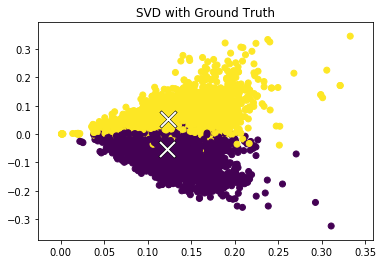

In [47]:
# SVD, ground truth

data_svd_to_plot = X_data_svd_r[:, 0:2] # Take the first two columns of the svd Data to plot

visualize(twenty_binary_labels, data_svd_to_plot, 'SVD with Ground Truth', 0)

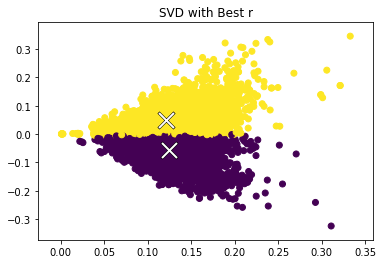

kmeans clustering results with k=2
-------------------------------------------------------------------
Homegeneity: 0.5954015716898193
Completeness: 0.596481359338038
V-measure: 0.5959409763965268
Adjusted Rand Index: 0.6968751458680187
Adjusted Mutual Information Score: 0.5953645305665899
-------------------------------------------------------------------


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [48]:
# SVD with best r

svd_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(X_data_svd_r.T[0:SVD_best_r].T)
data_svd_to_plot = X_data_svd_r[:, 0:2] # Take the first two columns of the svd Data to plot

visualize(svd_kmeans, data_svd_to_plot, 'SVD with Best r',1)

scores(twenty_binary_labels, svd_kmeans)

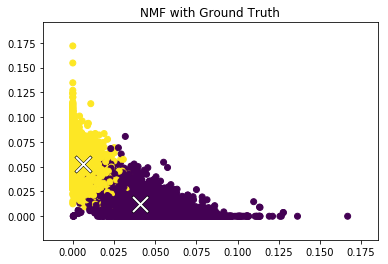

In [49]:
# NMF, ground truth

# Reset NMF
nmf = NMF(n_components=NMF_best_r)
X_data_nmf_r = nmf.fit_transform(X_data_tfidf)    

data_nmf_to_plot = X_data_nmf_r[:, 0:2] # Take the first two columns of the svd Data to plot

visualize(twenty_binary_labels, data_nmf_to_plot, 'NMF with Ground Truth')

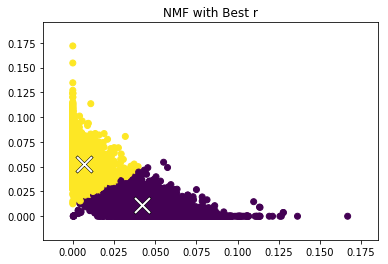

kmeans clustering results with k=2
-------------------------------------------------------------------
Homegeneity: 0.6790483562300399
Completeness: 0.680131609210451
V-measure: 0.6795895510492934
Adjusted Rand Index: 0.7770177788377391
Adjusted Mutual Information Score: 0.6790189730005426
-------------------------------------------------------------------


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [50]:
# NMF with best r

# Reset NMF

nmf = NMF(n_components=NMF_best_r)
X_data_nmf_r = nmf.fit_transform(X_data_tfidf)    
nmf_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(X_data_nmf_r)

data_nmf_to_plot = X_data_nmf_r[:, 0:2] # Take the first two columns of the svd Data to plot

visualize(nmf_kmeans, data_nmf_to_plot, 'NMF with Best r',1)

scores(twenty_binary_labels, nmf_kmeans)

#### Question 8

Transforming the data

In [51]:
# Scaling features such that each feature has unit variance

def scaling (features): # Each column of the reduced dimension data has unit variance 
    return (features - np.mean(features,axis=0)) / np.std(features, axis=0)    

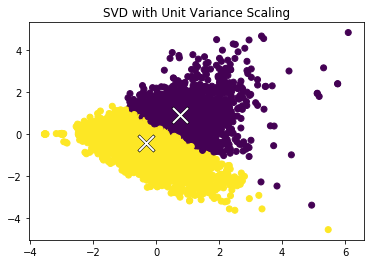

kmeans clustering results with k=2
-------------------------------------------------------------------
Homegeneity: 0.2353190059031418
Completeness: 0.26381163556564485
V-measure: 0.2487520767881836
Adjusted Rand Index: 0.2546253962601237
Adjusted Mutual Information Score: 0.23524899610477296
-------------------------------------------------------------------


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [52]:
# SVD with Unit Variance Transform

svd_uv_transform = scaling(X_data_svd_r)
svd_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(svd_uv_transform.T[0:SVD_best_r].T)

visualize(svd_kmeans, svd_uv_transform, 'SVD with Unit Variance Scaling',0)
scores(twenty_binary_labels, svd_kmeans)

In [53]:
# Logarithm transformation 

def logarithm_trans (features): 
    
    c_const = 0.01
    return np.sign(features) * (np.log(np.abs(features) + c_const) - np.log(c_const))

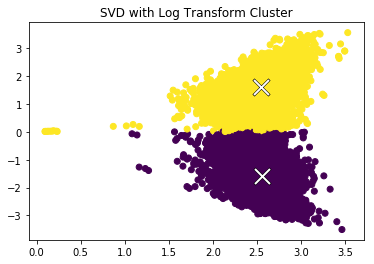

In [54]:
# SVD with Logarithm Transform

svd = TruncatedSVD(n_components=SVD_best_r)
X_data_svd_r = svd.fit_transform(X_data_tfidf)

svd_log_transform = logarithm_trans(X_data_svd_r)
svd_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(svd_log_transform[:, 0:SVD_best_r])

visualize(svd_kmeans, svd_log_transform, 'SVD with Log Transform Cluster',0)

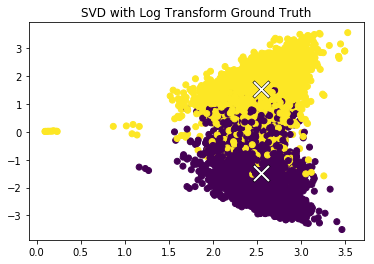

kmeans clustering results with k=2
-------------------------------------------------------------------
Homegeneity: 0.6085200422451277
Completeness: 0.6084855895990575
V-measure: 0.6085028154344264
Adjusted Rand Index: 0.7156430000270977
Adjusted Mutual Information Score: 0.6084497483752376
-------------------------------------------------------------------


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [55]:
visualize(twenty_binary_labels, svd_log_transform, 'SVD with Log Transform Ground Truth', 0)

scores(twenty_binary_labels, svd_kmeans)

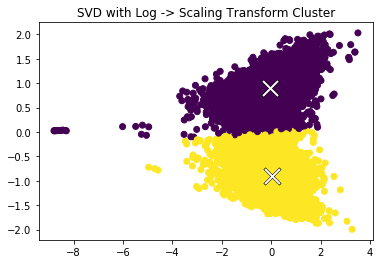

In [56]:
# SVD with Logarithm -> Scaling Transform

svd = TruncatedSVD(n_components=SVD_best_r)
X_data_svd_r = svd.fit_transform(X_data_tfidf)

svd_log_transform = logarithm_trans(X_data_svd_r)

svd_log_scaling_transform = scaling(svd_log_transform)
svd_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(svd_log_scaling_transform[:, 0:SVD_best_r])

visualize(svd_kmeans, svd_log_scaling_transform, 'SVD with Log -> Scaling Transform Cluster', 0)

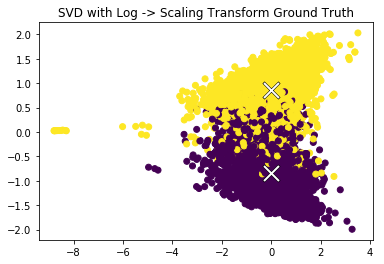

kmeans clustering results with k=2
-------------------------------------------------------------------
Homegeneity: 0.6058971816499252
Completeness: 0.6058567994978244
V-measure: 0.6058769899009998
Adjusted Rand Index: 0.7130690617015116
Adjusted Mutual Information Score: 0.6058207179832986
-------------------------------------------------------------------


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [57]:
visualize(twenty_binary_labels, svd_log_scaling_transform, 'SVD with Log -> Scaling Transform Ground Truth', 0)

scores(twenty_binary_labels, svd_kmeans)

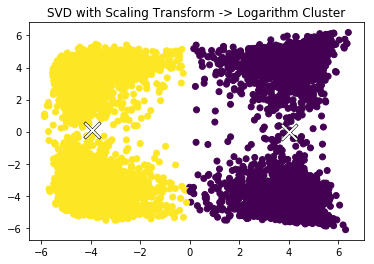

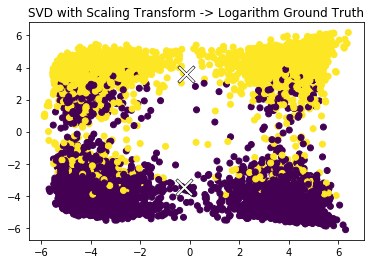

kmeans clustering results with k=2
-------------------------------------------------------------------
Homegeneity: 7.413801393166482e-05
Completeness: 7.429862806673192e-05
V-measure: 7.421823410387375e-05
Adjusted Rand Index: -1.3196858626130123e-05
Adjusted Mutual Information Score: -1.7405548986761833e-05
-------------------------------------------------------------------


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [58]:
# SVD with Scaling Transform -> Logarithm

svd = TruncatedSVD(n_components=SVD_best_r)
X_data_svd_r = svd.fit_transform(X_data_tfidf)

svd_scaling_transform = scaling(X_data_svd_r)

svd_scaling_log_transform = logarithm_trans(svd_scaling_transform)
svd_kmeans = KMeans(n_clusters=2, random_state=100, max_iter=2000, n_init=200).fit(svd_scaling_log_transform[:, 0:SVD_best_r])

visualize(svd_kmeans, svd_scaling_log_transform, 'SVD with Scaling Transform -> Logarithm Cluster')
visualize(twenty_binary_labels, svd_scaling_log_transform, 'SVD with Scaling Transform -> Logarithm Ground Truth',0)

scores(twenty_binary_labels, svd_kmeans)

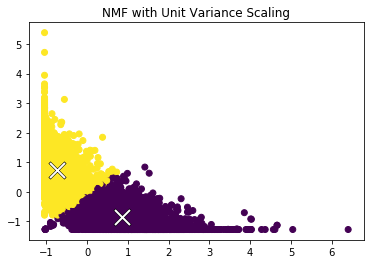

kmeans clustering results with k=2
-------------------------------------------------------------------
Homegeneity: 0.6828038321574016
Completeness: 0.6856459752144646
V-measure: 0.6842219522524521
Adjusted Rand Index: 0.7734426774605906
Adjusted Mutual Information Score: 0.6827747927166996
-------------------------------------------------------------------


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [59]:
# NMF with Unit Variance Transform

# Reset NMF
nmf = NMF(n_components=NMF_best_r)
X_data_nmf_r = nmf.fit_transform(X_data_tfidf)    

nmf_uv_transform = scaling(X_data_nmf_r)
nmf_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(nmf_uv_transform)

visualize(nmf_kmeans, nmf_uv_transform, 'NMF with Unit Variance Scaling', 0)
scores(twenty_binary_labels, nmf_kmeans)

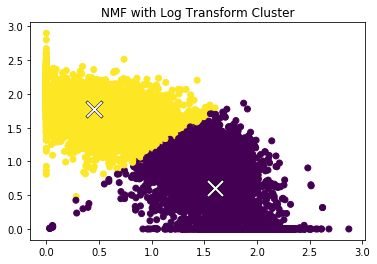

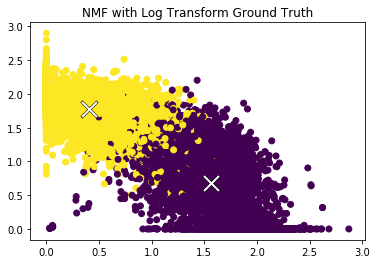

kmeans clustering results with k=2
-------------------------------------------------------------------
Homegeneity: 0.6757033916294439
Completeness: 0.6791388923298461
V-measure: 0.6774167862456966
Adjusted Rand Index: 0.7649847921825073
Adjusted Mutual Information Score: 0.6756737021308169
-------------------------------------------------------------------


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [60]:
# NMF with Logarithm Transform

# Reset NMF
nmf = NMF(n_components=NMF_best_r)
X_data_nmf_r = nmf.fit_transform(X_data_tfidf)    

nmf_log_transform = logarithm_trans(X_data_nmf_r)

nmf_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(nmf_log_transform)

visualize(nmf_kmeans, nmf_log_transform, 'NMF with Log Transform Cluster', 1)
visualize(twenty_binary_labels, nmf_log_transform, 'NMF with Log Transform Ground Truth', 1)

scores(twenty_binary_labels, nmf_kmeans)

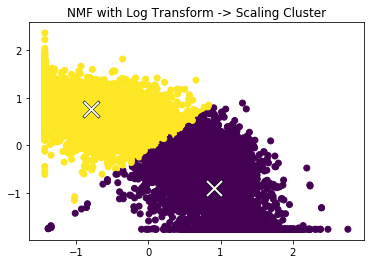

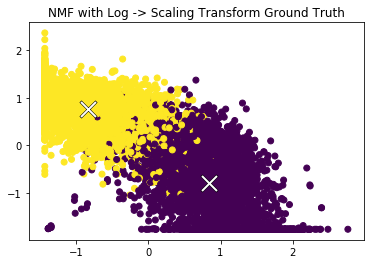

kmeans clustering results with k=2
-------------------------------------------------------------------
Homegeneity: 0.6863512458670783
Completeness: 0.6890551449829492
V-measure: 0.6877005376394759
Adjusted Rand Index: 0.777017803240186
Adjusted Mutual Information Score: 0.6863225311958289
-------------------------------------------------------------------


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [61]:
# NMF with Logarithm -> Scaling Transform

# Reset NMF
nmf = NMF(n_components=NMF_best_r)
X_data_nmf_r = nmf.fit_transform(X_data_tfidf)    

nmf_log_transform = logarithm_trans(X_data_nmf_r)
nmf_log_scaling_transform = scaling(nmf_log_transform)

nmf_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(nmf_log_scaling_transform)

visualize(nmf_kmeans, nmf_log_scaling_transform, 'NMF with Log Transform -> Scaling Cluster', 0)
visualize(twenty_binary_labels, nmf_log_scaling_transform, 'NMF with Log -> Scaling Transform Ground Truth', 1)

scores(twenty_binary_labels, nmf_kmeans)

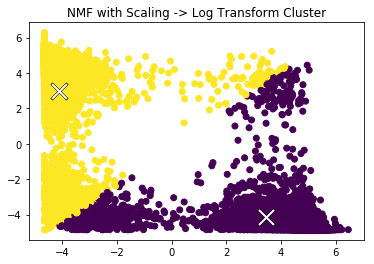

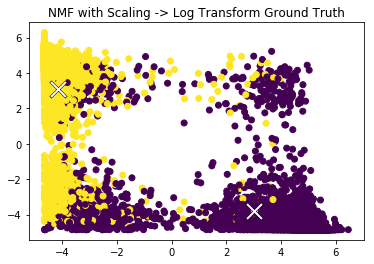

kmeans clustering results with k=2
-------------------------------------------------------------------
Homegeneity: 0.6899756001963567
Completeness: 0.6927701580853862
V-measure: 0.6913700552111113
Adjusted Rand Index: 0.779704559528204
Adjusted Mutual Information Score: 0.6899472173351168
-------------------------------------------------------------------


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [62]:
# NMF with Scaling -> Logarithm Transform

# Reset NMF
nmf = NMF(n_components=NMF_best_r)
X_data_nmf_r = nmf.fit_transform(X_data_tfidf)    

nmf_scaling_transform = scaling(X_data_nmf_r)

nmf_scaling_log_transform = logarithm_trans(nmf_scaling_transform)

nmf_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=40).fit(nmf_scaling_log_transform)

visualize(nmf_kmeans, nmf_scaling_log_transform, 'NMF with Scaling -> Log Transform Cluster', 0)
visualize(twenty_binary_labels, nmf_scaling_log_transform, 'NMF with Scaling -> Log Transform Ground Truth', 1)

scores(twenty_binary_labels, nmf_kmeans)

#### Question 11

##### Pull in the 20-category dataset

C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\matplotlib\axes\_base.py:3116: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\matplotlib\axes\_base.py:3122: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


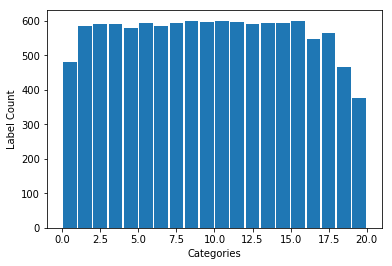

20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [63]:
# Fetch all 20 news groups categories and plot a histogram of the training documents.

twenty_data20 = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
x = range(-1,23)
plt.hist(twenty_data20.target, x, rwidth=0.9)
plt.xlabel('Categories')
plt.ylabel('Label Count')
plt.xlim(xmin=-1, xmax = 21)
plt.savefig('{}/20-groups.eps'.format(figs_dir), format='eps', dpi=100)
plt.show()

categories = twenty_data20.target_names
print(len(categories)) # there should be 20
print(categories)

##### Redo CountVect and TF-IDF calculations

In [64]:
# Push documents through CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()

count_vect20 = CountVectorizer(min_df=3, stop_words='english')

# do for the whole set
X_data20 = count_vect20.fit_transform(twenty_data20.data)

In [65]:
# Report shapes of TF-IDF matrices

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer20 = TfidfTransformer()

# do for training
X_data_tfidf20 = tfidf_transformer20.fit_transform(X_data20)
print('Dimensions of the TF-IDF matrix are: {}'.format(X_data_tfidf20.shape))

Dimensions of the TF-IDF matrix are: (11314, 38563)


##### Applying K-means

In [ ]:
# Applying k-means clustering
# data is called X_data_tfidf
from sklearn.cluster import KMeans
import time

#reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#perfroming kmeans clsutering with k=20
start_time = time.time()
kmeans20 = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init = 40, n_jobs=-1).fit(X_data_tfidf20)
print('Time taken for kmean 20-class clustering: {:.2f} minutes'.format((time.time() - start_time)/60))
      
kmeans_labels= kmeans20.labels_
category_labels = twenty_data20.target

#### Report the 5 measures:

In [ ]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

homogeneity = homogeneity_score(category_labels, kmeans_labels)
completeness = completeness_score(category_labels, kmeans_labels)
v_measure = v_measure_score(category_labels, kmeans_labels)
adjusted_rand_index = adjusted_rand_score(category_labels, kmeans_labels)
adjusted_mutual_info = adjusted_mutual_info_score(category_labels, kmeans_labels)

print('kmeans clustering results with k=20')
print('-------------------------------------------------------------------')
print('Homegeneity: {}'.format(homogeneity))
print('Completeness: {}'.format(completeness))
print('V-measure: {}'.format(v_measure))
print('Adjusted Rand Index: {}'.format(adjusted_rand_index))
print('Adjusted Mutual Information Score: {}'.format(adjusted_mutual_info))
print('-------------------------------------------------------------------')

##### and the contingency matrix:

In [ ]:
# Contingency matrix
from sklearn.metrics.cluster import contingency_matrix

contingency_matrix(category_labels, kmeans_labels)

#### Question 12

##### Function for saving pre-fit SVD and NMF scores

In [92]:
def load_scores(npz_name):
    import os
    import os.path as path

    out_dir = 'out'
    
    if not os.path.exists('{}'.format(out_dir)):
        os.mkdir('{}'.format(out_dir))
        
    if os.path.isfile('{}/{}.npz'.format(out_dir, npz_name)):
        data = np.load('{}/{}.npz'.format(out_dir, npz_name))
        
        return data
    else:
        return None
    
def save_scores(npz_name, data):
    import os
    import os.path as path

    out_dir = 'out'
    
    if not os.path.exists('{}'.format(out_dir)):
        os.mkdir('{}'.format(out_dir))
        
    np.savez('{}/{}'.format(out_dir, npz_name), homogeneity=data['homogeneity'], completeness=data['completeness'],
             v=data['v'], rand=data['rand'], mutual_info=data['mutual_info'])

##### Analyzing SVD:

In [93]:
# Initialize r, which is basically how many components we want to use.

r20 = [1, 2, 3, 5, 10, 20, 50, 100, 300, 1000]

In [94]:
# SVD

from sklearn.decomposition import TruncatedSVD

svd20 = TruncatedSVD(n_components=r20[-1])
X_data_svd_r20 = svd20.fit_transform(X_data_tfidf20)

In [95]:
# Import packages

from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

In [97]:
import time
start_time = time.time()

svd_npz_name = 'svd20'

data = load_scores(svd_npz_name)
if data is None:
    for i in range(len(r20)):
        interm_time = time.time()
        svd_kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=40, n_jobs=-1).fit(X_data_svd_r20[:, 0:r20[i]])
        svd_homogeneity[i] = homogeneity_score(category_labels, svd_kmeans.labels_)
        svd_completeness[i] = completeness_score(category_labels, svd_kmeans.labels_)
        svd_v[i] = v_measure_score(category_labels, svd_kmeans.labels_)
        svd_rand[i] = adjusted_rand_score(category_labels, svd_kmeans.labels_)
        svd_mutual_info[i] = adjusted_mutual_info_score(category_labels, svd_kmeans.labels_)
        print('r={}: {:.2f} minutes'.format(r20[i], (time.time() - interm_time)/60))
    data = {
        'homogeneity': svd_homogeneity,
        'completeness': svd_completeness,
        'v': svd_v,
        'rand': svd_rand,
        'mutual_info': svd_mutual_info
    }
    save_scores(svd_npz_name, data)
else:
    svd_homogeneity = data['homogeneity']
    svd_completeness = data['completeness']
    svd_v = data['v']
    svd_rand = data['rand']
    svd_mutual_info = data['mutual_info']
    
print('Time taken for kmean 20-class SVD search: {:.2f} minutes'.format((time.time() - start_time)/60))

Time taken for kmean 20-class SVD search: 0.00 minutes


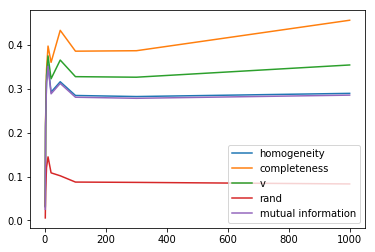

In [98]:
# Plot metrics for svd.

plt.figure()
plt.plot(r20, svd_homogeneity)
plt.plot(r20, svd_completeness)
plt.plot(r20, svd_v)
plt.plot(r20, svd_rand)
plt.plot(r20, svd_mutual_info)

plt.legend(['homogeneity', 'completeness', 'v', 'rand', 'mutual information'])
plt.show()

In [82]:
print('Homogeneity scores: ', np.round(svd_homogeneity, 4))
print('Completeness scores: ', np.round(svd_completeness, 4))
print('V measure scores: ', np.round(svd_v, 4))
print('Adjusted rand scores: ', np.round(svd_rand, 4))
print('Adjusted mutual information scores: ', np.round(svd_mutual_info, 4))

Homogeneity scores:  [0.0308 0.2142 0.2494 0.3168 0.3551 0.2926 0.3162 0.3046 0.3245 0.3054]
Completeness scores:  [0.0345 0.2313 0.2627 0.3436 0.3974 0.3604 0.4333 0.4334 0.4447 0.5313]
V measure scores:  [0.0325 0.2224 0.2559 0.3296 0.3751 0.323  0.3656 0.3578 0.3752 0.3879]
Adjusted rand scores:  [0.0058 0.0651 0.0835 0.1205 0.1449 0.1085 0.1019 0.0921 0.1081 0.0836]
Adjusted mutual information scores:  [0.0255 0.2099 0.2454 0.3131 0.3516 0.2887 0.3124 0.3007 0.3207 0.3014]


##### Analyzing NMF:

In [103]:
# Import packages

from sklearn.decomposition import NMF

from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

In [104]:
# Initialize an array for each metric.

nmf_homogeneity = np.zeros(len(r20))
nmf_completeness = np.zeros(len(r20))
nmf_v = np.zeros(len(r20))
nmf_rand = np.zeros(len(r20))
nmf_mutual_info = np.zeros(len(r20))

In [108]:
# Perform NMF for each number of components and calculate each metric

category_labels = twenty_data20.target

import time
start_time = time.time()

svd_npz_name = 'nmf20'

data = load_scores(svd_npz_name)
if data is None:
    for i in range(len(r20)):
        interm_time = time.time()
        nmf = NMF(n_components=r20[i])
        X_data_nmf_r = nmf.fit_transform(X_data_tfidf20)
        nmf_kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=40, n_jobs=-1).fit(X_data_nmf_r)
        nmf_homogeneity[i] = homogeneity_score(category_labels, nmf_kmeans.labels_)
        nmf_completeness[i] = completeness_score(category_labels, nmf_kmeans.labels_)
        nmf_v[i] = v_measure_score(category_labels, nmf_kmeans.labels_)
        nmf_rand[i] = adjusted_rand_score(category_labels, nmf_kmeans.labels_)
        nmf_mutual_info[i] = adjusted_mutual_info_score(category_labels, nmf_kmeans.labels_)
        print('r={}: {:.2f} minutes'.format(r20[i], (time.time() - interm_time)/60))
    data = {
        'homogeneity': nmf_homogeneity,
        'completeness': nmf_completeness,
        'v': nmf_v,
        'rand': nmf_rand,
        'mutual_info': nmf_mutual_info
    }
    save_scores(svd_npz_name, data)
else:
    nmf_homogeneity = data['homogeneity']
    nmf_completeness = data['completeness']
    nmf_v = data['v']
    nmf_rand = data['rand']
    nmf_mutual_info = data['mutual_info']
    
print('Time taken for kmean 20-class NMF search: {:.2f} minutes'.format((time.time() - start_time)/60))

Time taken for kmean 20-class NMF search: 0.00 minutes


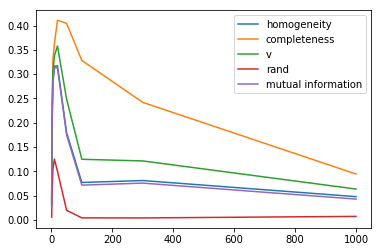

In [109]:
# Plot metrics for nmf.

plt.figure()
plt.plot(r20, nmf_homogeneity)
plt.plot(r20, nmf_completeness)
plt.plot(r20, nmf_v)
plt.plot(r20, nmf_rand)
plt.plot(r20, nmf_mutual_info)

plt.legend(['homogeneity', 'completeness', 'v', 'rand', 'mutual information'])
plt.show()

In [110]:
print('Homogeneity scores: ', np.round(nmf_homogeneity, 4))
print('Completeness scores: ', np.round(nmf_completeness, 4))
print('V measure scores: ', np.round(nmf_v, 4))
print('Adjusted rand scores: ', np.round(nmf_rand, 4))
print('Adjusted mutual information scores: ', np.round(nmf_mutual_info, 4))

Homogeneity scores:  [0.0308 0.1702 0.2169 0.2854 0.3163 0.317  0.1795 0.077  0.081  0.0478]
Completeness scores:  [0.0345 0.1816 0.2471 0.3284 0.362  0.4109 0.4044 0.3281 0.2418 0.0944]
V measure scores:  [0.0325 0.1757 0.231  0.3054 0.3376 0.3579 0.2487 0.1247 0.1214 0.0635]
Adjusted rand scores:  [0.0058 0.0493 0.0634 0.1039 0.1252 0.1002 0.0197 0.0042 0.0041 0.0072]
Adjusted mutual information scores:  [0.0255 0.1656 0.2127 0.2814 0.3125 0.3132 0.1749 0.0715 0.0757 0.0428]


##### Choosing best r for SVD and NMF

In [111]:
svd_r20_best = r20[np.argmax(svd_rand)]
print('best r20 svd:', svd_r20_best)
nmf_r20_best = r20[np.argmax(nmf_rand)]
print('best r20 nmf:', nmf_r20_best)

best r20 svd: 10
best r20 nmf: 10


##### Performing Scaling Transform and attaining new graphs

In [ ]:
svd_uv_transform20 = scaling(X_data_svd_r20)

svd_homogeneity = np.zeros(len(r20))
svd_completeness = np.zeros(len(r20))
svd_v = np.zeros(len(r20))
svd_rand = np.zeros(len(r20))
svd_mutual_info = np.zeros(len(r20))

category_labels = twenty_data20.target

import time
start_time = time.time()

for i in range(len(r20)):
    interm_time = time.time()
    svd_kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=40, n_jobs=-1).fit(svd_uv_transform20[:, 0:r20[i]])
    svd_homogeneity[i] = homogeneity_score(category_labels, svd_kmeans.labels_)
    svd_completeness[i] = completeness_score(category_labels, svd_kmeans.labels_)
    svd_v[i] = v_measure_score(category_labels, svd_kmeans.labels_)
    svd_rand[i] = adjusted_rand_score(category_labels, svd_kmeans.labels_)
    svd_mutual_info[i] = adjusted_mutual_info_score(category_labels, svd_kmeans.labels_)
    print('r={}: {:.2f} minutes'.format(r20[i], (time.time() - interm_time)/60))
    
print('Time taken for kmean 20-class SVD search: {:.2f} minutes'.format((time.time() - start_time)/60))